In [9]:
import pandas as pd
import datetime
import numpy as np
import math
import re
from matplotlib import pyplot as plt
import tensorflow as tf

coffee_prices = pd.read_csv('data/coffee-prices.csv')
coffee_prices["date"] = pd.to_datetime(coffee_prices['date'])
mask = (coffee_prices['date'] >= datetime.datetime(2019,1,1)) & (coffee_prices['date'] <= datetime.datetime(2019,12,31))
coffee_prices = coffee_prices.loc[mask]

oil_prices = pd.read_csv('data/oil-prices.csv')
oil_prices['date'] = pd.to_datetime(oil_prices['date'])
mask = (oil_prices['date'] >= datetime.datetime(2019,1,1)) & (oil_prices['date'] <= datetime.datetime(2019,12,31))
oil_prices = oil_prices.loc[mask]

stock_prices = pd.read_csv('data/colcap-prices.csv')[['Fecha','ultimo']]
stock_prices['Fecha'] = pd.to_datetime(stock_prices['Fecha'])
stock_prices['ultimo'] = pd.to_numeric(stock_prices['ultimo'])
stock_prices.columns = ['date','close']

exchange_rates = pd.read_csv("data/exchange-rates.csv")[["Date","Open"]]
exchange_rates['Date'] = pd.to_datetime(exchange_rates['Date'])
exchange_rates.columns = ['date','open']

In [10]:
all_data = pd.merge(coffee_prices, oil_prices, 'inner','date')
all_data.columns = ['date','coffee','oil']
all_data = pd.merge(all_data,stock_prices,'inner','date')
all_data.columns = ['date','coffee','oil','stock']
all_data = pd.merge(all_data,exchange_rates,'inner','date')
all_data.columns = ['date','coffee','oil','stock','dollar']
all_data = all_data.drop(columns=['date'])
all_data = all_data.to_numpy()
d1 = np.delete(all_data,0,0)
d2 = np.delete(all_data, all_data.shape[0]-1,0)
all_data = np.subtract(d1,d2)
all_data = pd.DataFrame(all_data, columns=['coffee_change','oil_change','stock_change','dollar_change'])
all_data.dollar_change = all_data.dollar_change.shift(-1)
all_data.drop(all_data.tail(1).index,inplace=True)
print(all_data)

     coffee_change  oil_change  stock_change  dollar_change
0           0.0265        0.61         15.73           5.50
1          -0.0055        0.84          8.22         -63.94
2           0.0345        1.82         11.49         -29.36
3           0.0025        2.61          9.37         -15.20
4          -0.0105        0.23          6.46           1.65
..             ...         ...           ...            ...
231         0.0350       -0.87         -3.86          16.50
232        -0.0540        0.08         22.18         -20.50
233         0.0410        0.66          1.58         -12.73
234        -0.0210        0.55         -6.73         -10.02
235         0.0520        0.04          1.32          13.75

[236 rows x 4 columns]


In [11]:
trainning_data = all_data.to_numpy()
trainning_data = np.swapaxes(trainning_data, 0, 1)
coffee, oil, stock, dollar = trainning_data

coffee = tf.keras.utils.normalize(coffee)
oil = tf.keras.utils.normalize(oil)
stock = tf.keras.utils.normalize(stock)

def categorize(array):
    newArray = []
    for i in array:
        if i > 0:
            newArray.append(1)
        else:
            newArray.append(-1)
    return newArray

labels = categorize(dollar)

trainning_data = np.array([coffee,oil,stock]).T.tolist()

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1,activation=tf.nn.tanh))

model.compile(optimizer='adam', loss=tf.keras.losses.Hinge(), metrics=['accuracy'])

model.fit(trainning_data, labels, epochs=5)

Epoch 1/5
8/8 [==============================] - 0s 1ms/step - loss: 1.0100 - accuracy: 0.0000e+00
Epoch 2/5
8/8 [==============================] - 0s 2ms/step - loss: 1.0097 - accuracy: 0.0000e+00
Epoch 3/5
8/8 [==============================] - 0s 2ms/step - loss: 1.0094 - accuracy: 0.0000e+00
Epoch 4/5
8/8 [==============================] - 0s 2ms/step - loss: 1.0092 - accuracy: 0.0000e+00
Epoch 5/5
8/8 [==============================] - 0s 2ms/step - loss: 1.0088 - accuracy: 0.0000e+00


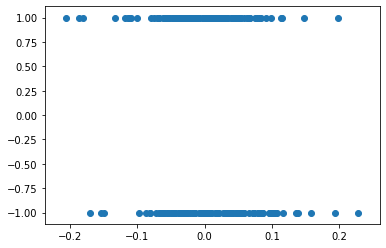

In [12]:
plt.scatter(coffee, labels)

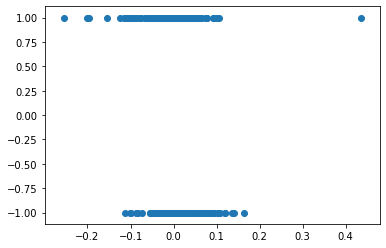

In [23]:
plt.scatter(oil,labels)

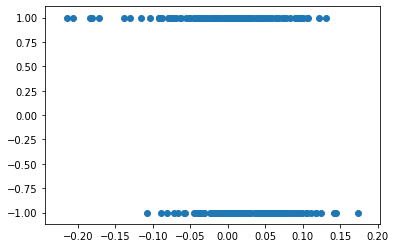

In [14]:
plt.scatter(stock,labels)

In [18]:
print(len(trainning_data))

236


In [19]:
print(len(labels))

236


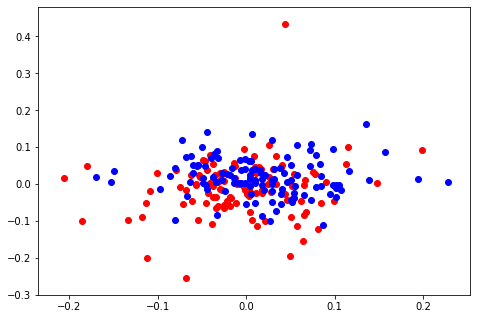

In [42]:
scatter_data=list(zip(trainning_data,labels))
scatter_positive_exchange = []
scatter_negative_exchange = []
for i in scatter_data:
    if i[1] == 1:
        scatter_positive_exchange.append(i[0][0])
    else:
        scatter_negative_exchange.append(i[0][0])
scatter_positive_exchange = np.transpose(scatter_positive_exchange)
scatter_negative_exchange = np.transpose(scatter_negative_exchange)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(scatter_positive_exchange[0],scatter_positive_exchange[1], color='r')
ax.scatter(scatter_negative_exchange[0],scatter_negative_exchange[1], color='b')
plt.show()

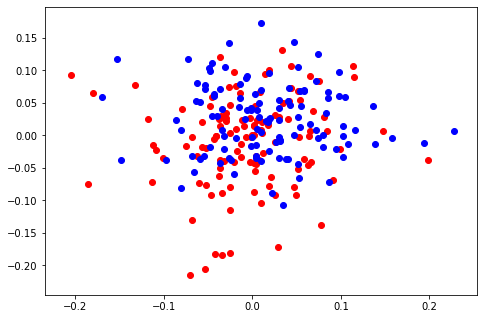

In [43]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(scatter_positive_exchange[0],scatter_positive_exchange[2], color='r')
ax.scatter(scatter_negative_exchange[0],scatter_negative_exchange[2], color='b')
plt.show()

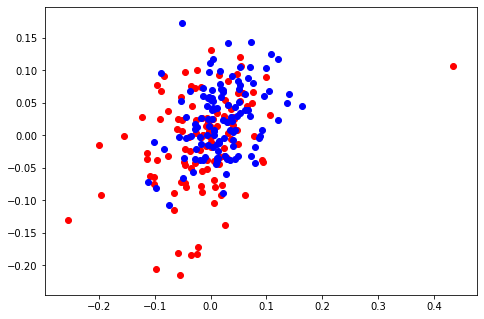

In [44]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(scatter_positive_exchange[1],scatter_positive_exchange[2], color='r')
ax.scatter(scatter_negative_exchange[1],scatter_negative_exchange[2], color='b')
plt.show()

In [ ]:
'''Ass you can see from the scatters above, it is virtually impossible to separate positive from negative which thus makes it impossible to know the exchange rate swing from comodity swing or indicator swing. So, it is not the model, but rather, it is the simple fact that such swings are not predictable p'''